In [1]:
# first import needed packages
import numpy as np
import xarray as xr
import xmitgcm
import xgcm
import glob
from os.path import expanduser,join
import sys
user_home_dir = expanduser('~')
sys.path.append(join(user_home_dir,'ECCOv4-py'))   # only needed if ecco_v4_py files are stored under this directory
import matplotlib.pyplot as plt
import ecco_v4_py as ecco
import ecco_access as ea
import gsw

In [2]:
access_mode = 's3_open_fsspec'

# download root (parent) directory
download_root_dir = join(user_home_dir,'efs_ecco','ECCO_V4r4_PODAAC')

# for access_mode = 's3_open_fsspec', need to specify the root directory 
# containing the jsons
jsons_root_dir = join(user_home_dir,'efs_ecco','mzz-jsons')
StartDate = '2000-02'
EndDate = '2000-10'
ShortNameList = ["ECCO_L4_GEOMETRY_LLC0090GRID_V4R4",\
                 "ECCO_L4_DENS_STRAT_PRESS_05DEG_DAILY_V4R4",\
                "ECCO_L4_SEA_ICE_SALT_PLUME_FLUX_LLC0090GRID_DAILY_V4R4"]
ds_dict = ea.ecco_podaac_to_xrdataset(ShortNameList,\
                                            StartDate=StartDate,EndDate=EndDate,\
                                            mode=access_mode,\
                                            download_root_dir=download_root_dir,\
                                            max_avail_frac=0.5,\
                                            jsons_root_dir=jsons_root_dir)

In [148]:
antarctica_geom = ds_dict[ShortNameList[0]].isel(tile=[0,3,9,12])
dsRHOAnoma = ds_dict[ShortNameList[1]]
saltflux_ds = ds_dict[ShortNameList[2]]

In [14]:
h = antarctica_geom.drF * antarctica_geom.hFacC 

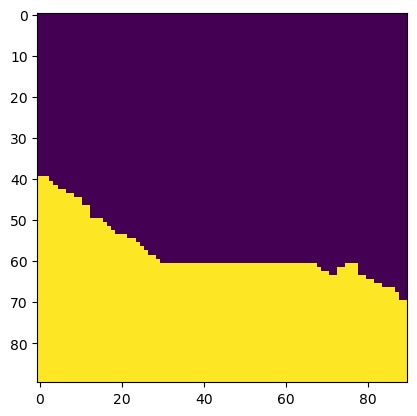

In [23]:
plt.imshow(h.isel(tile=0, k=0))

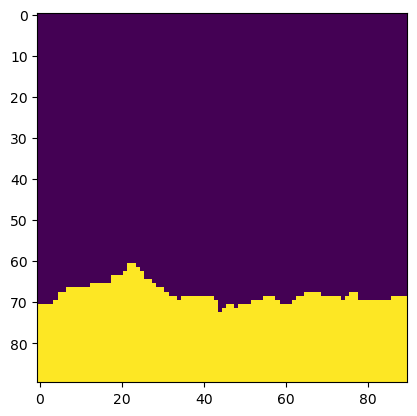

In [29]:
plt.imshow(h.isel(tile=1, k=0))

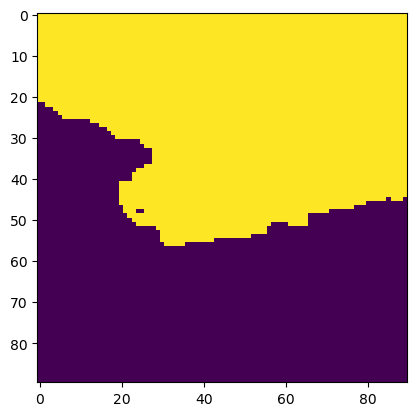

In [77]:
plt.imshow(h.T.isel(tile=2, k=0))

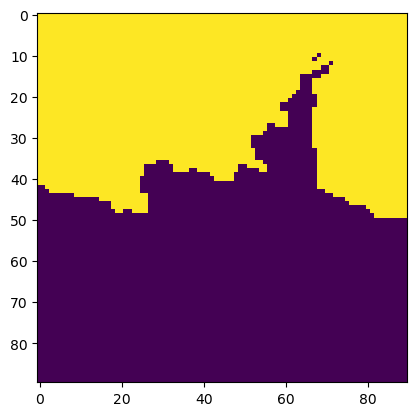

In [78]:
plt.imshow(h.T.isel(tile=3, k=0))

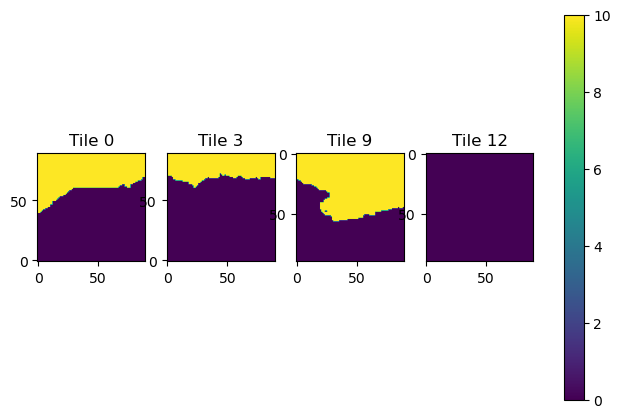

In [151]:
# plot the four antarctica tiles together 

fig, axes = plt.subplots(1, 4, figsize=(8,5))

im0 = axes[0].imshow(h.isel(tile=0, k=0), origin="lower")
axes[0].set_title("Tile 0")

im1 = axes[1].imshow(h.isel(tile=1, k=0), origin="lower")
axes[1].set_title("Tile 3")

im2 = axes[2].imshow(h.T.isel(tile=2, k=0), origin="upper")
axes[2].set_title("Tile 9")

im3 = axes[3].imshow(h.T.isel(tile=3, k=0), origin="upper")
axes[3].set_title("Tile 12")
cbar = fig.colorbar(im1, ax=axes, orientation='vertical')

#plt.title("Map of Antarctica Showing the Vertical Ocean Thickness", loc="center")

plt.show()

In [65]:
RHOAnoma_surf = dsRHOAnoma.RHOAnoma.isel(Z=0)

In [28]:
rho_anom_avg = np.zeros(ds_dict.RHOAnoma[:,0,0,0].shape)
for i in (ds_dict.RHOAnoma[0:3,0,0,0]):
    #print(i)
    #np.mean(ds_dict.RHOAnoma[i,0,0:70,:])

(274,)


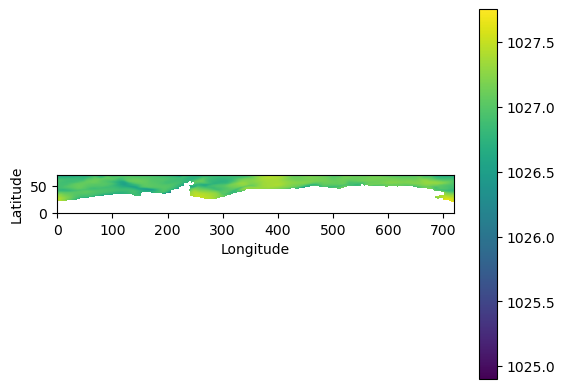

In [66]:
plt.imshow(RHOAnoma_surf[0,0:70,:]+1029, origin="lower")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()

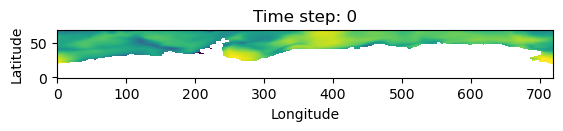

In [75]:
#Attempt at creating an animation of this

from matplotlib.animation import FuncAnimation
RHOAnoma_surf_normalized = RHOAnoma_surf + 1029
vmin, vmax = 1026, 1027.5

# Create the figure and axis
fig, ax = plt.subplots()

# Initialize the heatmap
heatmap = ax.imshow(RHOAnoma_surf_normalized[0, 0:70, :], origin='lower', vmin=vmin, vmax=vmax)

# Function to update the heatmap for each frame
def update(frame):
    heatmap.set_array(RHOAnoma_surf_normalized[frame, 0:70, :])
    ax.set_title(f'Time step: {frame}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    return heatmap,

# Create the animation
ani = FuncAnimation(fig, update, frames=range(RHOAnoma_surf_normalized.shape[0]), blit=True)



In [76]:
ani.save('/home/jovyan/efs_ecco/ikeshwan/heatmap_feb00tooct00.mp4', writer = 'ffmpeg', fps=26)

In [131]:
h.shape[0]

50

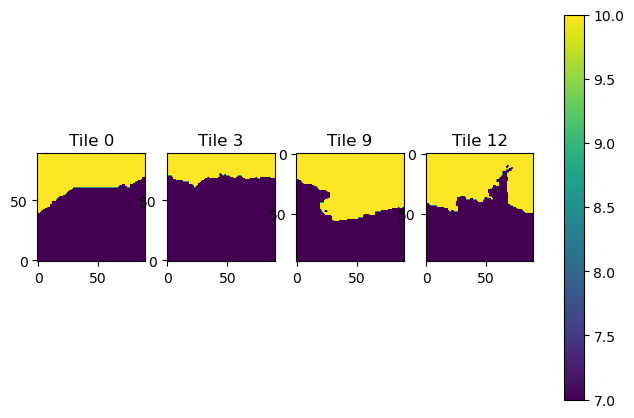

In [152]:
# animate the change in depth of water as it varies with z position

#initialized heat maps 
fig, axes = plt.subplots(1, 4, figsize=(8,5))
vmin, vmax = 7, 10

im0 = axes[0].imshow(h[0, 0, :, :], origin="lower", vmin=vmin, vmax=vmax)
axes[0].set_title("Tile 0")

im1 = axes[1].imshow(h[0, 1, :, :], origin="lower", vmin=vmin, vmax=vmax)
axes[1].set_title("Tile 3")

im2 = axes[2].imshow(h[0, 2, :, :].T, origin="upper", vmin=vmin, vmax=vmax)
axes[2].set_title("Tile 9")

im3 = axes[3].imshow(h[0, 3, :, :].T, origin="upper", vmin=vmin, vmax=vmax)
axes[3].set_title("Tile 12")
cbar = fig.colorbar(im1, ax=axes, orientation='vertical')

#update function to animate all four plots

def update(k):
    im0.set_data(h[k, 0, :, :])
    im1.set_data(h[k, 1, :, :])
    im2.set_data(h[k, 2, :, :].T)
    im3.set_data(h[k, 3, :, :].T)
    fig.suptitle(f'Step k={k}')
    return fig,

ani2 = FuncAnimation(fig, update, frames=range(h.shape[0]))

plt.show()



In [153]:
ani2.save('/home/jovyan/efs_ecco/ikeshwan/oceanthickness_goingdown.mp4', writer = 'ffmpeg', fps=26)

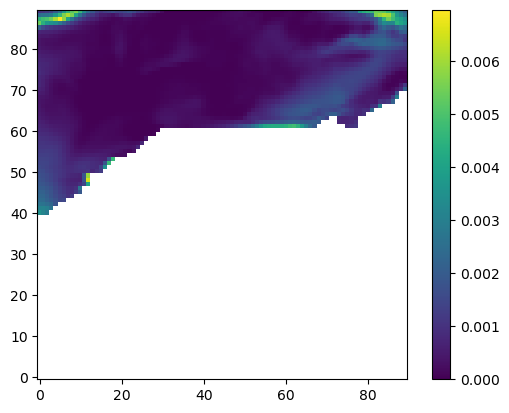

In [169]:

plt.imshow(saltflux_ds.oceSPflx[200, 0, :, :], origin="lower")
plt.colorbar()

In [170]:
saltflux_ds.oceSPflx.shape[0]

274

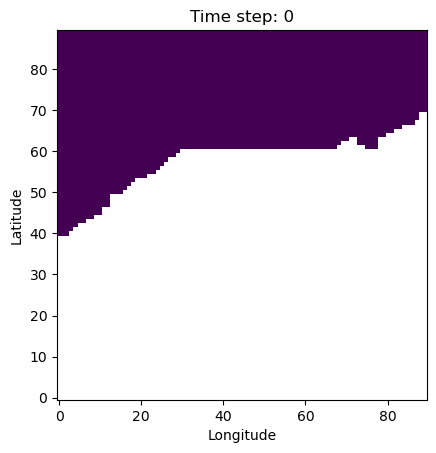

In [173]:
# Create the figure and axis
fig3, ax = plt.subplots()

# Initialize the heatmap
heatmap = ax.imshow(saltflux_ds.oceSPflx[0, 0, :, :], origin='lower', vmin=vmin, vmax=vmax)

# Function to update the heatmap for each frame
def update(time):
    heatmap.set_array(saltflux_ds.oceSPflx[time, 0, :, :])
    ax.set_title(f'Time step: {time}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    return heatmap,

# Create the animation
ani3 = FuncAnimation(fig3, update, frames=range(saltflux_ds.oceSPflx.shape[0]))


In [174]:
ani3.save('/home/jovyan/efs_ecco/ikeshwan/surfsaltflux_winter.mp4', writer = 'ffmpeg', fps=26)

In [176]:
saltflux = saltflux_ds.oceSPflx[:,:,:,:]

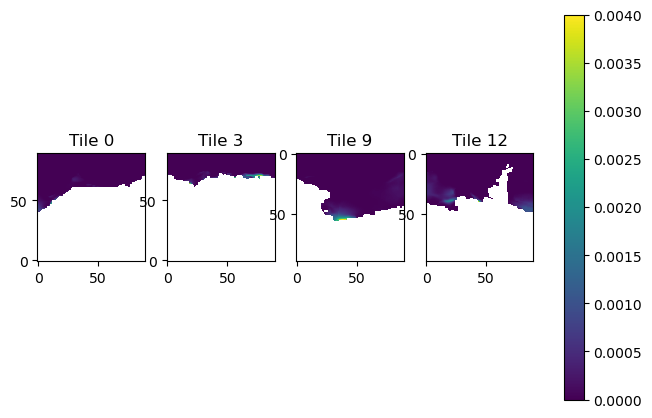

In [178]:
# plot the four antarctica heatmap of salt flux at surface together 

fig, axes = plt.subplots(1, 4, figsize=(8,5))

im0 = axes[0].imshow(saltflux.isel(tile=0, time=0), origin="lower")
axes[0].set_title("Tile 0")

im1 = axes[1].imshow(saltflux.isel(tile=3, time=0), origin="lower")
axes[1].set_title("Tile 3")

im2 = axes[2].imshow(saltflux.T.isel(tile=9, time=0), origin="upper")
axes[2].set_title("Tile 9")

im3 = axes[3].imshow(saltflux.T.isel(tile=12, time=0), origin="upper")
axes[3].set_title("Tile 12")
cbar = fig.colorbar(im1, ax=axes, orientation='vertical')

#plt.title("Map of Antarctica Showing the Vertical Ocean Thickness", loc="center")

plt.show()

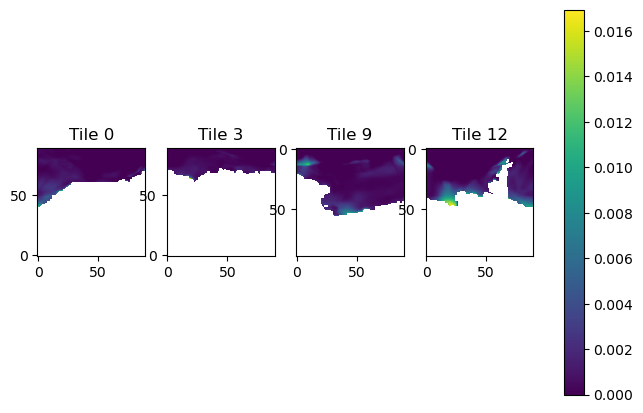

In [191]:
# plot the four antarctica heatmap of salt flux at surface together 

fig, axes = plt.subplots(1, 4, figsize=(8,5))

im0 = axes[0].imshow(saltflux.isel(tile=0, time=273), origin="lower")
axes[0].set_title("Tile 0")

im1 = axes[1].imshow(saltflux.isel(tile=3, time=273), origin="lower")
axes[1].set_title("Tile 3")

im2 = axes[2].imshow(saltflux.T.isel(tile=9, time=273), origin="upper")
axes[2].set_title("Tile 9")

im3 = axes[3].imshow(saltflux.T.isel(tile=12, time=273), origin="upper")
axes[3].set_title("Tile 12")
cbar = fig.colorbar(im1, ax=axes, orientation='vertical')

#plt.title("Map of Antarctica Showing the Vertical Ocean Thickness", loc="center")

plt.show()